In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon_Sales_Data.csv')
df.shape

(100, 14)

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
df.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Revenue'] = df['Units Sold'] * df['Unit Price']
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Year,Revenue
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,576782.80
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,3296425.02


# **Exploratory Data Analysis (EDA)**

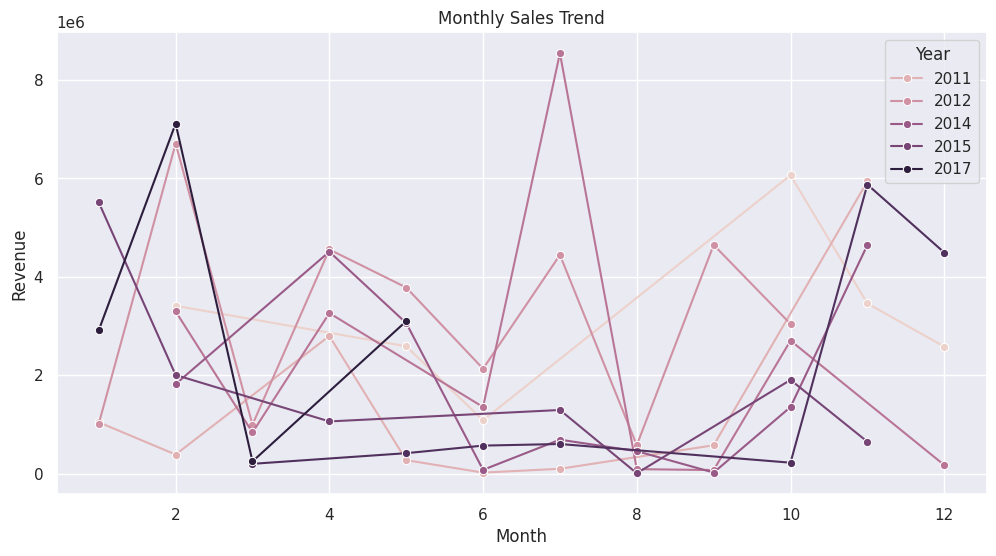

In [ ]:
# 1. Monthly Sales Trend
monthly_sales = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Revenue', hue='Year', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend(title='Year')
plt.show()

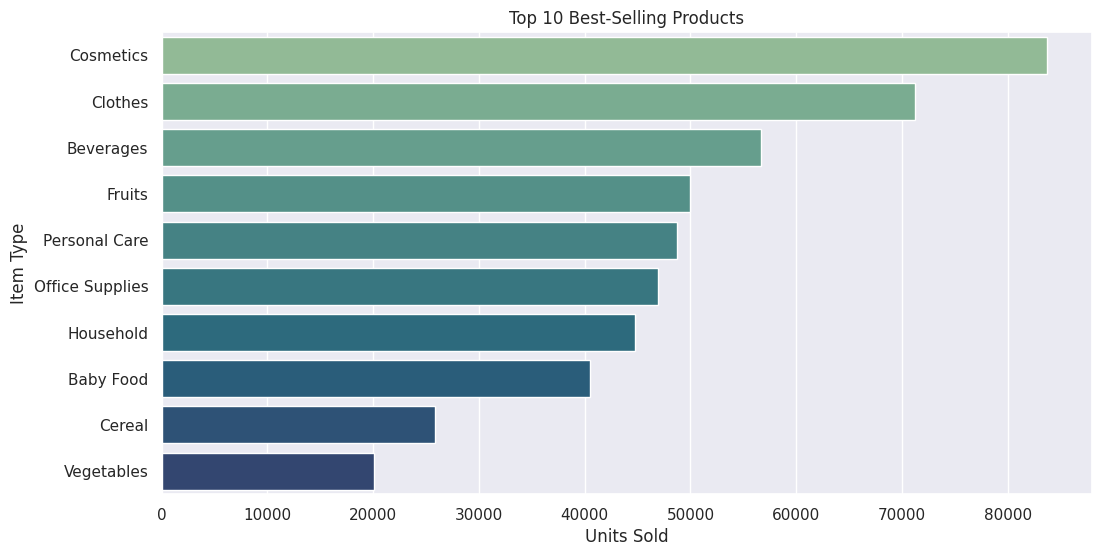

In [ ]:
# 2. Top 10 Best-Selling Products
top_products = df.groupby('Item Type')['Units Sold'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=top_products, x='Units Sold', y='Item Type', palette='crest')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Units Sold")
plt.ylabel("Item Type")
plt.show()

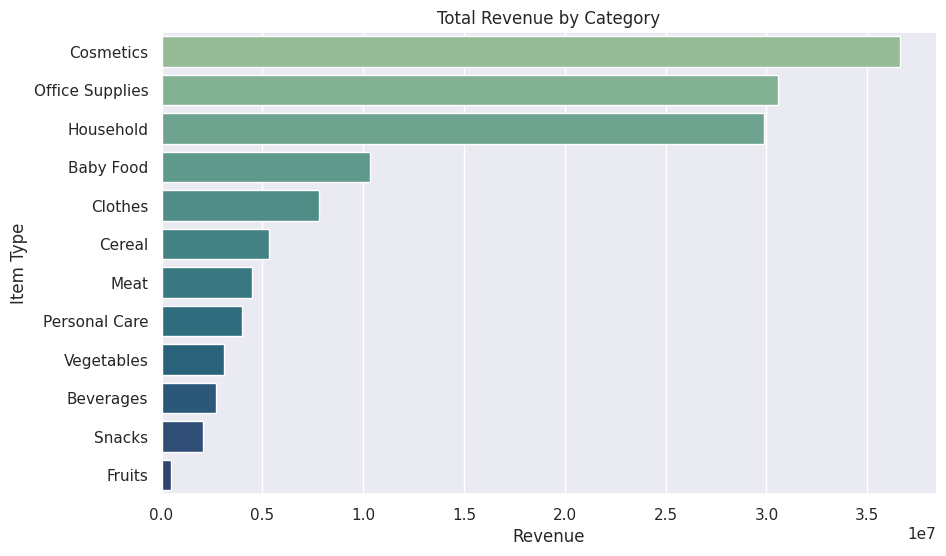

In [ ]:
# 3. Revenue by Category
category_revenue = df.groupby('Item Type')['Revenue'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=category_revenue, x='Revenue', y='Item Type',palette='crest')
plt.title("Total Revenue by Category")
plt.xlabel("Revenue")
plt.ylabel("Item Type")
plt.show()

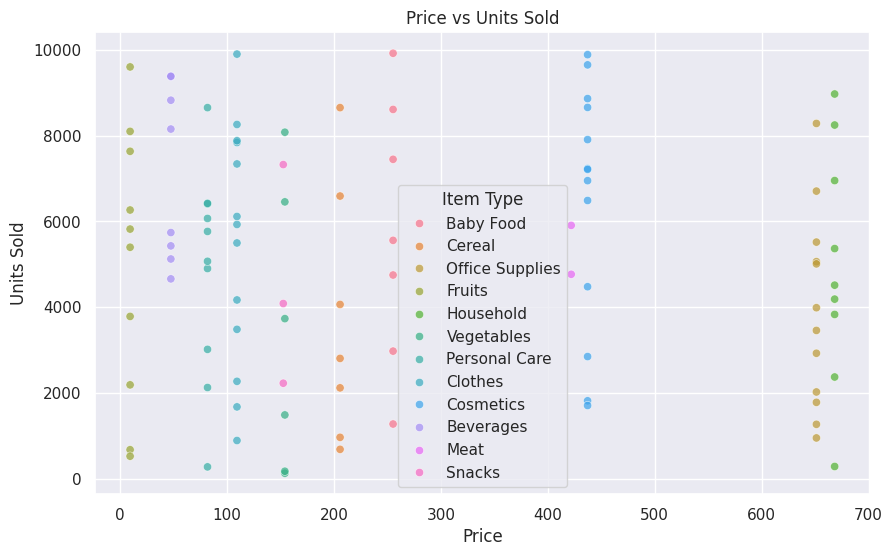

In [ ]:
# 4. Price vs Units Sold (Product Popularity)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Unit Price', y='Units Sold', hue='Item Type', alpha=0.7)
plt.title("Price vs Units Sold")
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.legend(title="Item Type")
plt.show()

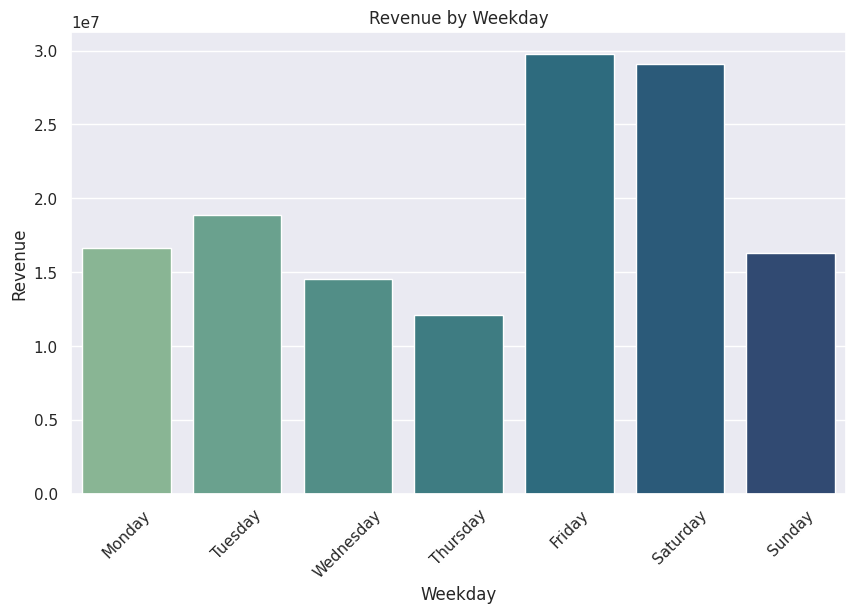

In [ ]:
# 5. Sales Distribution by Weekday
df['Weekday'] = df['Order Date'].dt.day_name()
weekday_sales = df.groupby('Weekday')['Revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=weekday_sales, x='Weekday', y='Revenue', palette='crest')
plt.title("Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

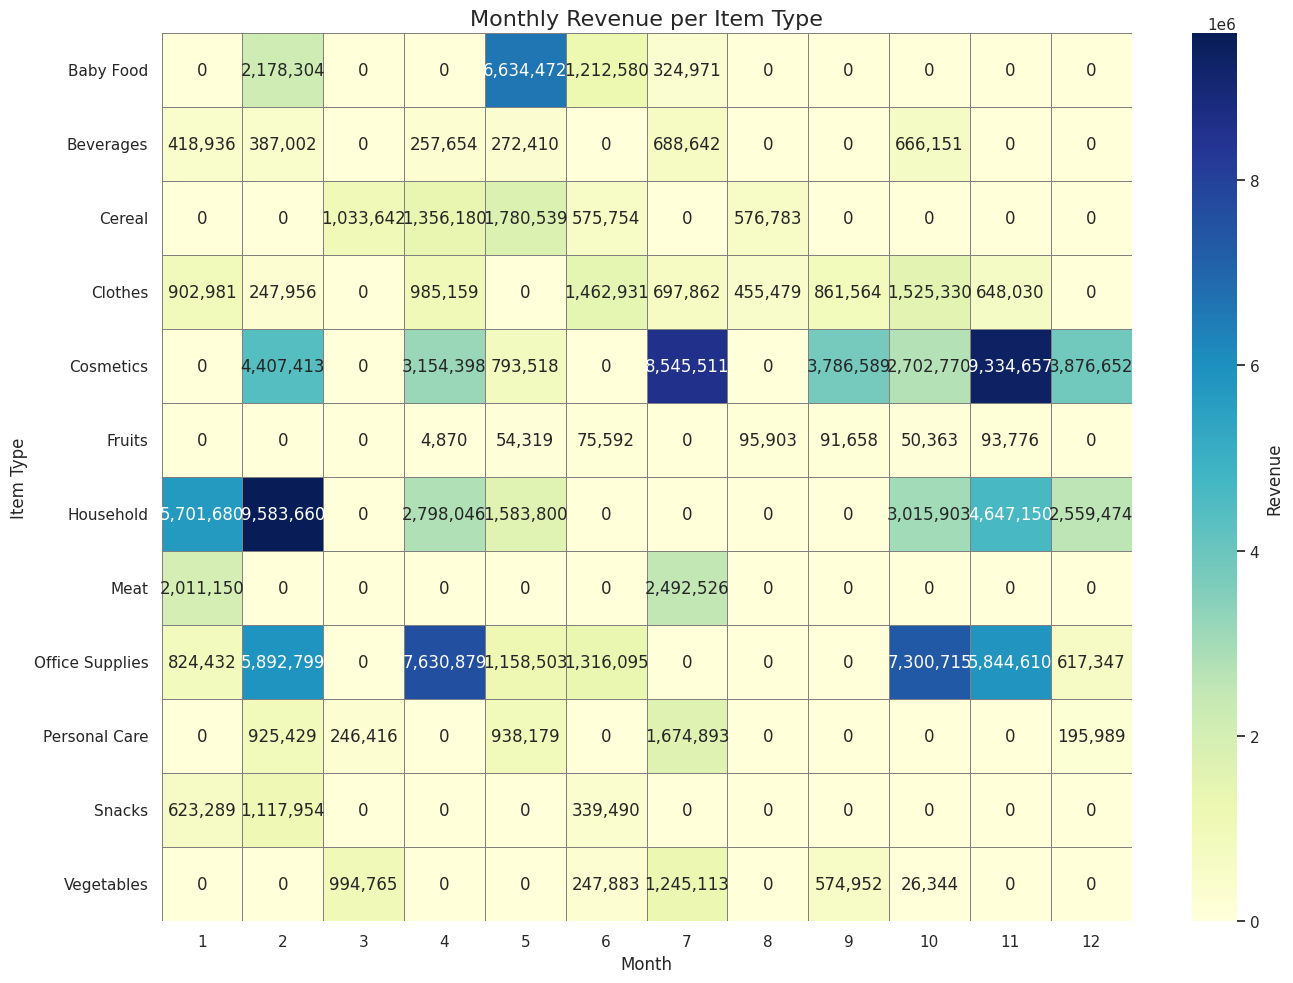

In [ ]:
# 6. Category-wise Monthly Revenue Heatmap

# Pivot table for heatmap
heatmap_data = df.pivot_table(
    index='Item Type',
    columns='Month',
    values='Revenue',
    aggfunc='sum'
).fillna(0)

# Optional: Sort months correctly if they appear unordered
heatmap_data = heatmap_data[sorted(heatmap_data.columns)]

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    annot=True,
    fmt=",.0f",  # Adds thousands separator
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Revenue'}
)

plt.title("Monthly Revenue per Item Type", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Item Type", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


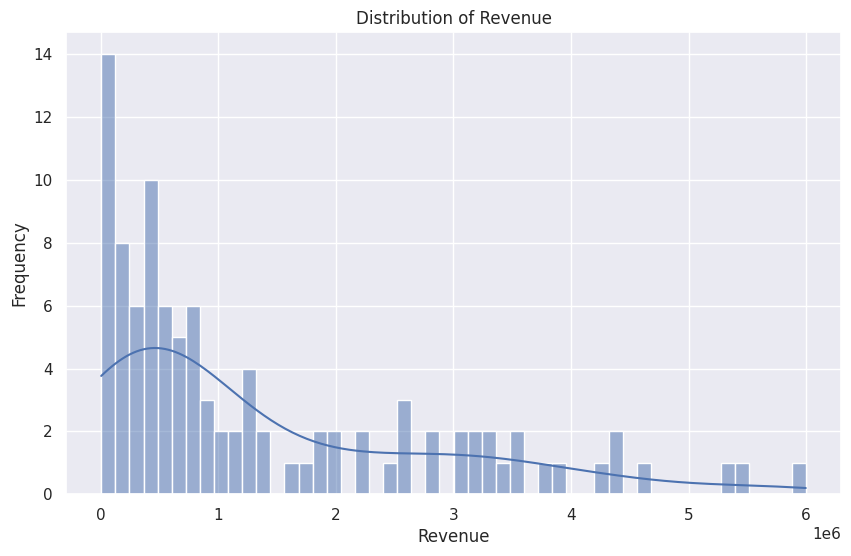

In [ ]:
# 7. Revenue Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue'], bins=50, kde=True, palette='crest')
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Frequency')

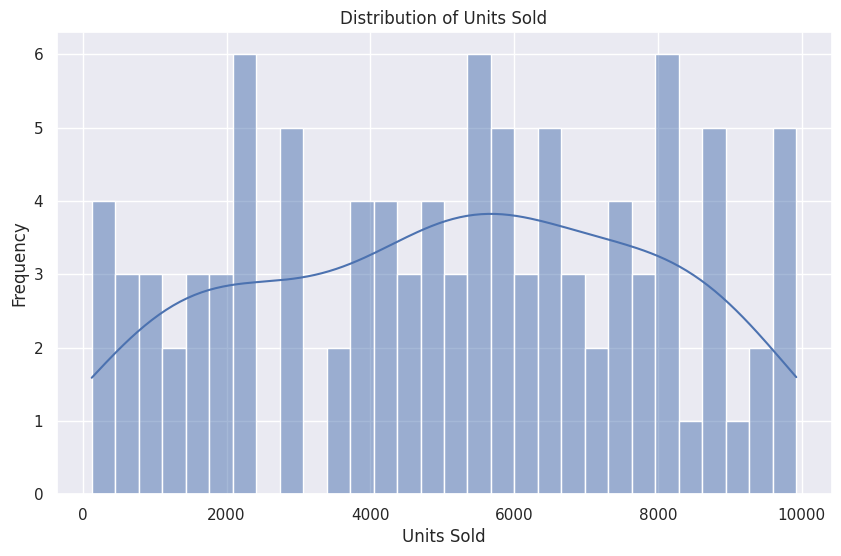

In [ ]:
# 8. Units Sold Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Units Sold'], bins=30, kde=True, palette='crest')
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")

# **Thank You**